# Actividad 2 :  Resolución de problema mediante búsqueda heurística

## Objetivos de la actividad

Con esta actividad vas a conseguir implementar la estrategia de búsqueda heurística A* para la resolución de un problema real.

## Descripción de la actividad

![texto alternativo](https://drive.google.com/uc?export=view&id=1nku190wKb1Wn8V-d_X8RVoREuKjavF0I)

La empresa Amazon desea utilizar un robot para ordenar el inventario de su almacén. 

Amazon cuenta con 3 inventarios (mesa con suministros para vender) localizados en unas posiciones específicas del almacén. El robot se debe encargar de mover los 3 inventarios a una posición objetivo. 

El robot puede moverse horizontal y verticalmente, y cargar o descargar un inventario. 

Un ejemplo del robot, moviendo el inventario, se puede observar en el siguiente vídeo:

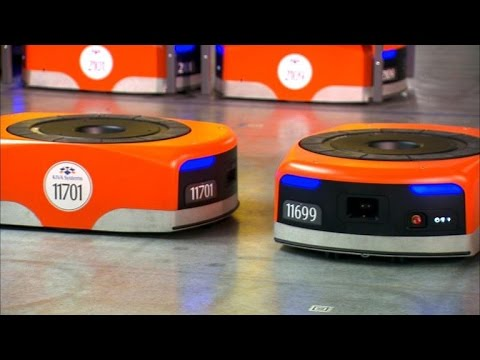

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('UtBa9yVZBJM')

En esta actividad has de utilizar la estrategia de búsqueda heurística A* con el fin de generar un plan que permita al robot de Amazon mover el inventario de un estado inicial a un estado objetivo. 

### Autores:

- Íñigo Blázquez Tatiegi
- José Del Castillo Izquierdo
- Nicolás Forero Arévalo
- Guillermo Botana Novillo-Fertrell
- Alberto Jiménez Sánchez

#### Fecha: 02/02/2021

## Resumen
El presente trabajo aborda un problema de búsqueda de la distancia más corta entre dos puntos para un robot de Amazon, el cual pretende mover determinados objetos desde un punto inicial a un punto final. Partiendo de 3 inventarios, los cuales están en una posición determinada M1, M2 y M3, la tarea programada para este robot es la de llevar estos tres inventarios a su estado final asignado, los cuales llamaremos M1’, M2’ y M3’.
##### Palabras clave: estrella, estados, heurística.

## Introducción
Esta actividad tiene como objetivo la de utilizar una estrategia de búsqueda heurística A* con el fin de generar un plan que permita al robot de Amazon mover el inventario de un estado inicial a un estado objetivo. Los estados inicial y final se muestran:

## Estado inicial

El estado inicial del problema lo vamos a representar en una mátriz 4x4 de carácteres de la siguiente manera:


![texto alternativo](https://drive.google.com/uc?export=view&id=1Mzml6909YsiwqCB77-xeLYRoVt93uLKg)		

Donde, 


*   R: representa el robot. Inicialmente está ubicado en la posición [2,2]
*   \#: representa una pared. 
*   M1, M2, e M3: representan los tres inventarios que el robot debe mover. Y se encuentran ubicadas en las posiciones [0,0], [2,0] y [0,3] respectivamente.


## Estado Objetivo 

El robot debe mover los 3 inventarios, M1, M2 y M3, a la siguientes posiciones:


![texto alternativo](https://drive.google.com/uc?export=view&id=1rhaD4HXNAHjp9v2algygF38-OVNePBSe)

Mediante la implementación del algoritmo de búsqueda A* se trata de resolver este problema evitando los obstáculos que no puede atravesar dicho robot, remarcados con almohadilla. Estos obstáculos simulan ser paredes del almacén donde está el robot en cuestión.

Antes de comenzar con el desarrollo, se va a definir el algoritmo de búsqueda heurística A*. 

El término heurística viene del griego y sifnifica encontrar o descubrir. La heurística surge resolviendo problemas y observando cómo se han resuelto otros. Es decir, podemos definirla como la manera en que se alcanza la solución a un problema mediante la evaluación de los procesos alcanzados durante la búsqueda del estado objetivo (Álvarez, 2021).

En el caso del algoritmo de estrella o A*, éste utiliza una función de evaluación f(n)=g(n)+h’(n), donde h’(n) representa el coste estimado para llegar al nodo objetivo desde el nodo actual, y g(n) representa el coste real desde el nodo inicial hasta el nodo actual. Es decir, una suma entre el coste real de llegar al estado actual desde el punto inicial y el valor estimado para llegar al punto final desde el nodo actual.

El algoritmo A* es una combinación de búsqueda en anchura y en profundidad. Las propiedades de este algoritmo son las que a continuación se relacionan:

-	Completo.
-	Si h’(n)=0, se comporta como el algoritmo de búsqueda de coste uniforme.
-	Si g(n)=0, se comporta como el algoritmo voraz (greedy).
-	Admisible: h’(n)<= h(n), donde h(n) es el coste real de haber llegado desde el nodo actual al nodo objetivo.
-	Consistente o monótona.

Una vez introducido el funcionamiento del algoritmo se van a definir los posibles planteamientos del coste que se le puede atribuir a este algoritmo de búsqueda. 
Se entiende el coste como el valor de la distancia entre el nodo inicial y los distintos valores que pueden tomar hasta llegar al estado final. El objetivo del robot es el de llegar al estado final. No obstante, debe llegar minimizando este coste o distancia. Unas de las posibles distancias que se pueden tener en cuenta son las siguientes:

-	Distancia Manhattan: debe su nombre a su similitud con las manzanas de las ciudades, donde dichos edificios no se pueden atravesar. En términos matemáticos, no es más que el resultado de sumar los valores absolutos de las diferencias de coordenadas de cada punto.
-	Distancia Euclídea: esta distancia es la obtenida tras aplicar Pitágoras.

Una vez introducido el algoritmo y las variables que permiten analizar cuán buena es nuestra búsqueda se continua con el desarrollo de la actividad.


# Desarrollo

## 1. Creamos la clase para guardar los nodos

Creamos la clase **Node** para guardar los siguientes atributos:

* position: El estado del problema
* parent: El nodo con el estado anterior
* f: El coste total del nodo
* g: La distancia entre el nodo actual y el nodo inicial
* h: Estimación de la distancia desde el nodo actual hasta el nodo final


In [1]:
class Node:
    def __init__(self, parent=None, position=None):

        self.position = position      
        self.parent = parent
 

        self.f = 0
        self.g = 0
        self.h = 0


    def __eq__(self, other):
        return self.position == other.position

## 2. Definimos las funciones necesarias para el algoritmo A*

### Distancia entre los dos nodos

Para el cálculo de la distancia entre los dos nodos vamos a utilizar la distancia Manhattan calculando la diferencia entre las coordenadas de dos posiciones pasadas por argumento. Estas posiciones se representaran en duplas con la forma (f,c) donde f representa las filas por orden descendente y c representa las columnas en orden ascendente.

In [2]:
def get_distance_between_two_nodes(pos1, pos2):
    """Calculamos la distancia entre dos posiciones dentro del mapa"""
    x = abs(pos2[0] - pos1[0])
    y = abs(pos2[1] - pos1[1])
    return x + y

### Obtener los vecinos

Esta función nos permitirá obtener las posiciones vecinas de un nodo ***node*** pasado como argumento, a partir de un problema representado en una matriz (lista de listas) en el argumento ***matrix***.

In [3]:
def get_neighbors(node, matrix, goal):
    neighbors = []
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    for i in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
        row = node.position[0] + i[0]
        col = node.position[1] + i[1]
        # Comprobamos que los nodos vecinos estan dentro de los limites del problema
        if row >= num_rows or row < 0 or col >= num_cols or col < 0:
            continue
        # Evitamos las paredes (#), otros inventarios (Mx), y nodos ya analizados
        if matrix[row][col] not in ["", goal] or (node.parent is not None and (row, col) == node.parent.position):
            continue
        neighbors.append((row, col))

    return neighbors

### Algoritmo A*

In [4]:
def a_star(space, start_node, end_node):
    """Algoritmo A*"""
    # Obtenemos los valores de h y f del primer nodo
    start_node.h = get_distance_between_two_nodes(start_node.position, end_node.position)
    start_node.f = start_node.g + start_node.h

    # Obtenemos el nombre del inventario a alcanzar
    goal = space[end_node.position[0]][end_node.position[1]]

    open_list = [start_node]
    closed_list = []
    path = []

    while len(open_list) > 0:

        current_node = open_list[0]
        # Comprobamos si el nodo actual es el nodo objetivo
        if current_node.__eq__(end_node):
            path.append(current_node)
            return path

        childrens = []
        # Obtenemos los siguientes nodos a analizar
        neighbors = get_neighbors(current_node, space, goal)

        if not neighbors:
            # Si no hay mas nodos a analizar se eliminan de la ruta final y se vuelve al nodo de inicio
            current = current_node.parent

            while current.parent is not None:
                path.remove(current)
                current = current.parent
            current_node = current.parent
            path.remove(current)
            open_list.pop(0)
            # En la lista abierta dejamos el nodo de inicio
            open_list.append(current_node)
        else:
            # Creamos los siguientes nodos a analizar
            for child in neighbors:
                childrens.append(Node(current_node, position=(child[0], child[1])))
            # Obtenemos los valores de g, h y f para cada nodo vecino
            for child_node in childrens:
                # Comprobamos que ese nodo no haya sido analizado previamente
                if child_node not in closed_list:
                    child_node.g = current_node.g + 1
                    child_node.h = get_distance_between_two_nodes(child_node.position, end_node.position)
                    child_node.f = child_node.g + child_node.h
            # Si no hay mas nodos para analizar es que no hay ruta hacia ese inventario
            if not childrens:
                return None

            # Ordenamos los nodos hijo por orden de menor f
            childrens = sorted(childrens, key=lambda node: node.f)

            open_list.pop(0)
            # Añadimos el nodo actual a la lista cerrada
            closed_list.append(current_node)
            # En la lista abierta metemos el siguiente nodo
            open_list.append(childrens[0])
            # Añadimos el nodo actual a la ruta final
            path.append(current_node)

### Obtenemos el path del inventario usando A*

In [5]:
def get_inv_order_path(space, robot_position, inv_ini, inv_fin):
    """
    Obtenemos el orden en el que el robot debe mover los inventarios
    """
    inv_order_list = []
    childrens = {}
    # Creamos el Nodo con la posición del robot
    robot_node = Node(position=robot_position)

    # Recorremos la lista de inventarios donde iremos calculando la ruta que debe hacer el robot para alcanzar cada
    # inventario desde su posición actual
    for i in list(inv_fin.keys()):
        inv_node_start = Node(position=inv_ini[i])
        inv_node_end = Node(position=inv_fin[i])
        inv_going = a_star(space, start_node=robot_node, end_node=inv_node_start)
        inv_return = a_star(space, start_node=inv_node_start, end_node=inv_node_end)
        # Si existe ruta de ida y vuelta a ese nodo, se añadirá a la lista de rutas
        if inv_going and inv_going[-1] and inv_return and inv_return[-1]:
            childrens[i] = inv_going + inv_return
    # Ordenamos la lista de rutas de mas corta a mas larga
    childrens_sorted = sorted(childrens.items(), key=lambda x: len(x[1]))
    # Cogemos el Inventarío mas cercano, que será el primero que moverá el robot
    first_inv_key = childrens_sorted[0][0]
    # Lo eliminamos de la lista de inventarios a alcanzar
    inv_fin.pop(first_inv_key)
    # Eliminamos el inventario del mapa
    space[inv_ini[first_inv_key][0]][inv_ini[first_inv_key][1]] = ""
    # Añadimos la ruta
    inv_order_list = inv_order_list + childrens[first_inv_key]
    # Si quedan inventarios por mover, volvemos a aplicar el método de forma recursiva con la posición del robot despues
    # de mover el inventario anterior
    if inv_fin:
        robot_position = childrens[first_inv_key][-1].position
        inv_order_list = inv_order_list + get_inv_order_path(space, robot_position, inv_ini, inv_fin)
    return inv_order_list

## 3. Probamos nuestra implementación con el problema de la Actividad

In [7]:
FINAL_POSITIONS = {
    "M1": (3, 3),
    "M2": (3, 2),
    "M3": (3, 1)
}

ROBOT_POSITION = (2, 2)

MAPA = [
    ["M1", "#", "", "M3"],
    ["", "#", "", ""],
    ["M2", "", "R", ""],
    ["", "F3", "F2", "F1"],
]

def get_inventories_positions(matrix):
    inventories = {}
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix[0])):
            if matrix[i][j].__contains__("M"):
                inventories[matrix[i][j]] = (i, j)
    return inventories



matrix = [["M1", "#", "", "M3"],
        ["", "#", "", ""],
        ["M2", "", "", ""],
        ["", "", "", ""],]

INITIAL_POSITIONS = get_inventories_positions(matrix)
path = get_inv_order_path(matrix, ROBOT_POSITION, INITIAL_POSITIONS, FINAL_POSITIONS)

last_pos = ()
for i in path:
    if i:
        if last_pos == (i.position[0], i.position[1]):
            content = MAPA[i.position[0]][i.position[1]]
            if content[0] == "M":
                print(f"R carga el inventario nº {content[1]} en: fila {i.position[0]} columna {i.position[1]}")
            else:
                print(f"R suelta el inventario nº {content[1]} en: fila {i.position[0]} columna {i.position[1]}")
        else:
            print(f"Mover R a: fila {i.position[0]} columna {i.position[1]}")
        last_pos = (i.position[0], i.position[1])

Mover R a: fila 2 columna 2
Mover R a: fila 2 columna 1
Mover R a: fila 2 columna 0
R carga el inventario nº 2 en: fila 2 columna 0
Mover R a: fila 3 columna 0
Mover R a: fila 3 columna 1
Mover R a: fila 3 columna 2
R suelta el inventario nº 2 en: fila 3 columna 2
Mover R a: fila 3 columna 3
Mover R a: fila 2 columna 3
Mover R a: fila 1 columna 3
Mover R a: fila 0 columna 3
R carga el inventario nº 3 en: fila 0 columna 3
Mover R a: fila 1 columna 3
Mover R a: fila 2 columna 3
Mover R a: fila 3 columna 3
Mover R a: fila 3 columna 2
Mover R a: fila 3 columna 1
R suelta el inventario nº 3 en: fila 3 columna 1
Mover R a: fila 2 columna 1
Mover R a: fila 2 columna 0
Mover R a: fila 1 columna 0
Mover R a: fila 0 columna 0
R carga el inventario nº 1 en: fila 0 columna 0
Mover R a: fila 1 columna 0
Mover R a: fila 2 columna 0
Mover R a: fila 3 columna 0
Mover R a: fila 3 columna 1
Mover R a: fila 3 columna 2
Mover R a: fila 3 columna 3


### Conclusiones
La mayor dificultad con la que nos encontramos fue al encontrar la forma de que el robot encontrara el orden más eficiente para mover los inventarios. Este problema al final lo resolvimos con un método recursivo. 
El equipo ha quedado satisfecho con el trabajo realizado y con los resultados obtenidos al utilizar el algoritmo A* y gracias a este proyecto hemos aprendido mucho mejor como funciona este algoritmo visto en clase.


### Bibliografía
- Álvarez, C. A. (2021). Tema 6. Búsqueda heurística. 
- http://razonartificial.com/2010/03/pathfinding-a-en-python-parte-i/
- https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2